# K-Means Clustering
<br><br>

The K-Means clustering algorithm can be used to reduce the dimensionality of a data set. It is an **unsupervised learning** model and, as its name suggests, it is often used to find clusters in unlabeled data. Roughly speaking, for a fixed $K$ the algorithm does the following:

### Step 1 - Initialization
Randomly initialize $K$ points, called the cluster centroids, in feature space.

$$ C = c_1, c_2, ..., c_K  $$

### Step 2 - Main Loop
Repeat until steady-state or some halting condition is reached.

### Step 3 - Point to Cluster Assignment
For each input data point $\underline{x}$ assign it to the cluster whose centroid it is closest to. Use the Euclidean norm ($l2$), i.e. distance, between each centroid $c$ and point $x_i$ to make the decision. 

$$\underset{c_i \in C}{\mathrm{argmin}}\quad distance(c_i, x)^2 $$

### Step 4 - Recalculate Centroid Locations
Recompute the location of each cluster centroid to be the average position of the points in that cluster.
$$ c_i = \frac{1}{|P_i|} \sum_{x_i \in P_i} x_i $$

Where $P_i$ is the set of all points belonging to the $i^{th}$ cluster and $|P_i|$ is the cardinality of $P_i$, i.e. the number of points in cluster $P_i$. 


<br><br>
## How do you chose the value of K?

Sometimes you will have an idea or will outright know the value of $K$. However, if that is not the case, the *elbow method* is often used to find $K$. The elbow method is an iterative procedure that searches through a range of values of $K$ to determine a cost for said $K$. The cost, as a function of $K$, could be the mean sum of squared errors between each $x_i$ and its cluster. As the value of $K$ increases, this cost function should decrease and ultimately reach a limit. The idea is to pick the smallest $K$ that produces a reasonably low value for the cost function. In the image below you will see that you may most likely chose $K=3$.

![Elbow Method](elbow-method.png)
<br>

## How do you set the halting/steady-state condition (step 2)?

The four stopping conditions listed below may be used singularly or in some combination:
- Convergence - pick a tolerance $\epsilon$ and when the improvement in the distance function is lower than the tolerance, stop.
- Stop when reaching a maximum number of iterations.
- Pick a tolerance $\epsilon$. Stop when the variance between distances does not improve by at least $\epsilon$. 
- Pick a tolerance $\epsilon$. Stop when the variance between distances does not improve by at least $\epsilon * \text{initial variance}$. 

<br>

## A word of caution

The K-Means clustering algorithm results are sensitive to the initial location of the centroids, therefore, it is highly advisable to run the algorithm many times each with a different starting point for the centroids.

<br>

## Implementing K-Means using sklearn

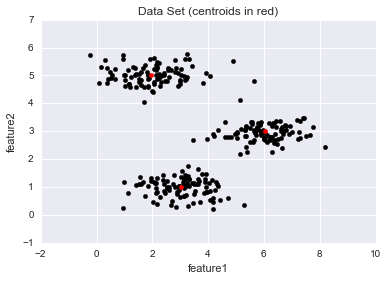

Below are the cluster centroids:
[[ 3.04367119  1.01541041]
 [ 1.95399466  5.02557006]
 [ 6.03366736  3.00052511]]


In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# Import the cluster data set
C = scipy.io.loadmat("ex7data2.mat")["X"]

clusters = KMeans(n_clusters=3, n_init=30)
clusters.fit(C)

plt.scatter(C[:, 0], C[:, 1],  color='black')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Data Set (centroids in red)")
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], color='red')
plt.show()

print("Below are the cluster centroids:")
print(clusters.cluster_centers_)

The code below shows how the K-Means clustering algorithm progesses by updating the centroids. The initial centroids are colored black. The update goes to red(1 step), yellow(2 steps) and finally orange(3 steps). Note how the centroids approach the actual clusters.

Centroids after taking 1 step(s)
[[ 1.51032511  2.99488328]
 [ 3.65329922  3.01461038]
 [ 6.61911283  2.88457819]]
Centroids after taking 2 step(s)
[[ 1.68380424  3.83198713]
 [ 3.53070894  2.22636003]
 [ 6.2162905   2.94048092]]
Centroids after taking 3 step(s)
[[ 1.94403425  4.98654075]
 [ 3.1418993   1.12228185]
 [ 6.13478785  3.00402709]]


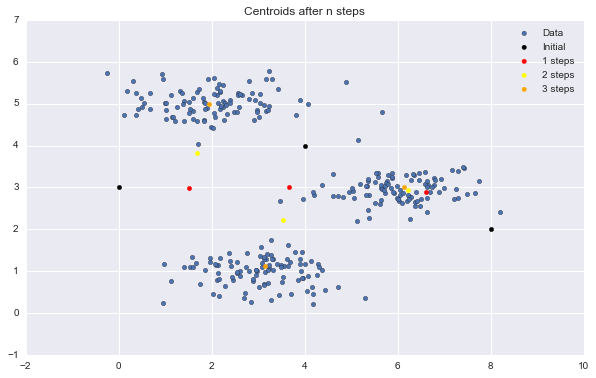

In [2]:
LABEL_COLOR_MAP = {0 : 'black', 1 : 'red', 2 : 'yellow', 3 : 'orange'}

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(C[:, 0], C[:, 1], label="Data")

clusters.random_state = 11  # Make it start at the same place each time
clusters.n_init = 1  # Only let it run the algorithm one time

init_pts = np.array([[0, 3], [4, 4], [8, 2]])
clusters.init = init_pts # Initialize cluster centroids to specific location
ax.scatter(init_pts[:, 0], init_pts[:, 1], label="Initial", color=LABEL_COLOR_MAP[0])

for n in np.arange(1, 4):
    print("Centroids after taking {0} step(s)".format(n))
    clusters.max_iter = n  # Max number of steps the algorithm is allowed to take
    clusters.fit(C)
    cs = clusters.cluster_centers_
    print(cs)
    ax.scatter(cs[:, 0], cs[:, 1], label="%i steps" %(n,), color=LABEL_COLOR_MAP[n])
ax.legend(loc="upper right")
ax.set_title("Centroids after n steps")

<br>
## Implementing K-Means using sklearn for color compression
<br>
The input image is rgb with dimensions 128x128. So the shape of the data for the image is (128, 128, 3) with the third dimension being a three byte rgb representation for each pixel. 

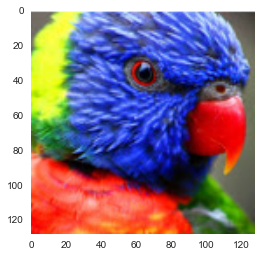

(128, 128, 3)


In [3]:
# Use K-means to compress an image, the image is in R^3, r, g, b
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
image = mpimg.imread("k-means-image.png")
plt.imshow(image)
plt.grid(False)
plt.show()
print(image.shape)
# Need this scaling to correct the colors
image_orig = image
image = image*255

<br>
Below are two plots. The first is a scatter plot of the image data in $R^3$, i.e. its RGB representation. The second plot is the result of the K-means cluster algorithm with K=16, i.e. we are compressing the original image to only use 16 colors in total.
<br>

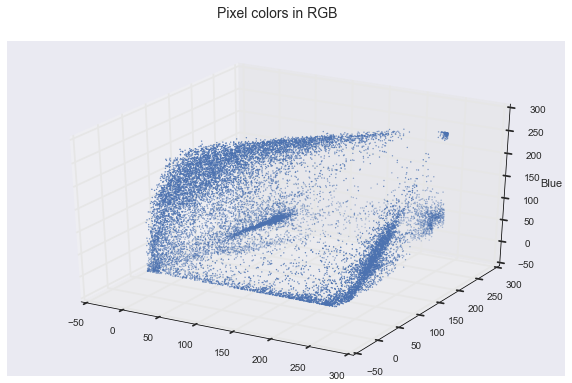

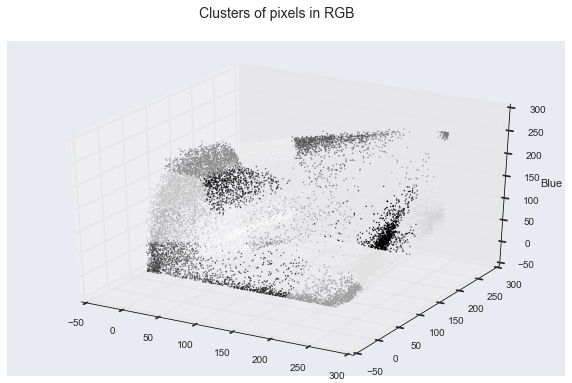

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("Blue")
fig.suptitle("Pixel colors in RGB", fontsize=14)
ax.scatter(image[:, :, 0], image[:, :, 1], zs=image[:, :, 2], s=2, lw=0)

# Compute k-means with K=16
pixels = np.reshape(image, [128**2, 3])
color_clust = KMeans(n_clusters=16, n_init=20)
color_clust.fit(pixels)
#color_clust.cluster_centers_

# Plot the clusters of the input data
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle("Clusters of pixels in RGB", fontsize=14)
ax.set_zlabel("Blue")
ax.scatter(image[:, :, 0], image[:, :, 1], zs=image[:, :, 2], c=color_clust.labels_, s=2, lw=0)

<br>
Finally the code below will adjust each image pixel to become corresponding color out of the 16 options. The results are displayed in the image on the right. 
<br>

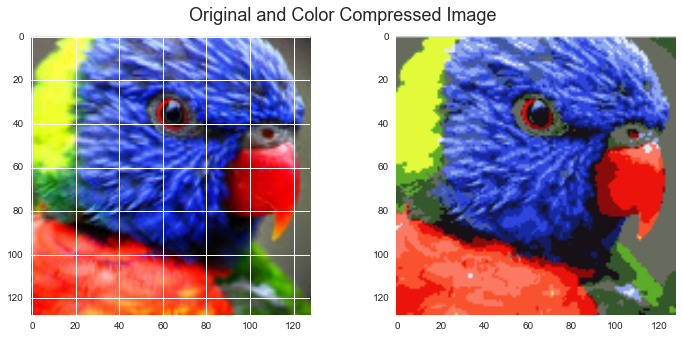

In [5]:
newcolors = np.round(color_clust.cluster_centers_)

def map_color(vec):
    cluster = color_clust.predict(vec.reshape(1, -1))
    return newcolors[cluster[0]]

compressed_img = np.apply_along_axis(map_color, 2, image)
compressed_img = compressed_img.astype(np.uint8)  # Cast to unsigned int so imshow knows what to do with it

fig, axs = plt.subplots(ncols=2, figsize=[12, 5])
plt.grid(False)
fig.suptitle("Original and Color Compressed Image", fontsize=18)
axs[0].imshow(image_orig)
axs[1].imshow(compressed_img)

# Take away
- K-Means clustering is very literal about the value $K$ that is chosen. If you chose the wrong value for $K$ you get what you asked for. So if there is only one cluster in the data but you set $K=5$ then you will get five clusters.
- Make sure to standardize or scale your data because K-Means clustering is sensitive magnitude due to its use of the Euclidean norm, i.e. distance. 
- K-Means could get stuck in a local minimum so you have to be careful about the stopping/halting condition setting.

# Resources
- Here is an example of K-Means clustering coded up in Python: https://mubaris.com/2017/10/01/kmeans-clustering-in-python/